In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Input
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

In [71]:
def report(y_pred, y_test, history):
    
    print(f'R^2:{r2_score(y_test, y_pred)};')
    print(f'MAE: {np.mean(np.abs(np.squeeze(y_pred) - y_test))};')
    
    plt.title('Loss')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

    plt.title('MAE')
    plt.plot(history.history['mae'])
    plt.plot(history.history['val_mae'])
    plt.ylabel('mae')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    
    plt.plot([i for i in range(min(len(y_test), 100))], 
             y_pred[:min(len(y_test), 100)], 
             label='predicted')
    plt.plot([i for i in range(min(len(y_test), 100))], 
             y_test[:min(len(y_test), 100)], 
             label='true')
    plt.legend()
    plt.show()

## Daily

In [4]:
daily_data = pd.read_csv('../Data/daily.csv', index_col=0)

In [5]:
daily_X = daily_data.drop(columns=['cnt', 'casual', 'registered', 'dteday'])
daily_y = daily_data.cnt

In [8]:
daily_X_train, daily_X_test, daily_y_train, daily_y_test = train_test_split(daily_X, daily_y)
scaler1 = MinMaxScaler()
daily_X_train = scaler1.fit_transform(daily_X_train)
daily_X_test = scaler1.transform(daily_X_test)

In [52]:
def create_nn_daily():

    seq_input = Input(shape=daily_X_train.shape[1])
    
    x = Dense(32, activation='relu')(seq_input)
    X = Dropout(0.2)(x)

    out = Dense(1)(x)

    model = Model(seq_input, out)

    model.compile(loss='mean_squared_error',
                  optimizer='adam',
                  metrics=['mae'])
    return model

In [53]:
daily_nn = create_nn_daily()

In [54]:
history = daily_nn.fit(daily_X_train, daily_y_train,
                        batch_size=64, 
                        epochs=2000, 
                        validation_split=0.1,
                        use_multiprocessing=True,
                        verbose=0
                       )

R^2:0.748755348960751;
MAE: 726.1083157231899;


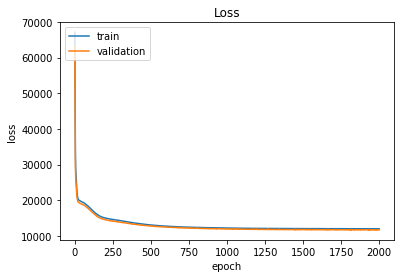

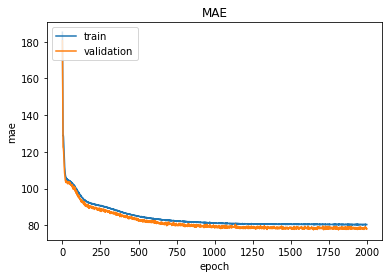

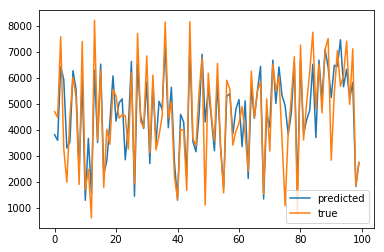

In [72]:
report(daily_nn.predict(daily_X_test), daily_y_test, history)

## Hourly

In [56]:
hourly_data = pd.read_csv('../Data/hourly.csv', index_col=0)

In [57]:
hourly_X = hourly_data.drop(columns=['cnt', 'casual', 'registered', 'dteday'])
hourly_y = hourly_data.cnt

In [58]:
hourly_X_train, hourly_X_test, hourly_y_train, hourly_y_test = train_test_split(hourly_X, hourly_y)
scaler2 = MinMaxScaler()
hourly_X_train = scaler2.fit_transform(hourly_X_train)
hourly_X_test = scaler2.transform(hourly_X_test)

In [59]:
def create_nn_hourly():

    seq_input = Input(shape=hourly_X_train.shape[1])
    
    x = Dense(32, activation='relu')(seq_input)
    X = Dropout(0.2)(x)

    out = Dense(1)(x)

    model = Model(seq_input, out)

    model.compile(loss='mean_squared_error',
                  optimizer='adam',
                  metrics=['mae'])
    return model

In [61]:
hourly_nn = create_nn_hourly()

In [62]:
history = hourly_nn.fit(hourly_X_train, hourly_y_train,
                        batch_size=64, 
                        epochs=2000, 
                        validation_split=0.1,
                        use_multiprocessing=True,
                        verbose=0
                       )

R^2:0.6197231088614198;
MAE: 81.22366270113595;


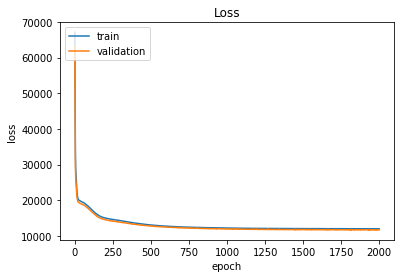

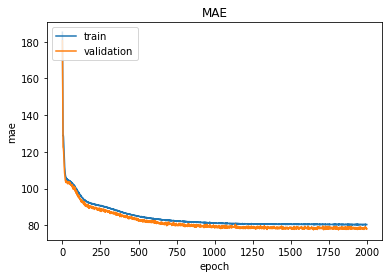

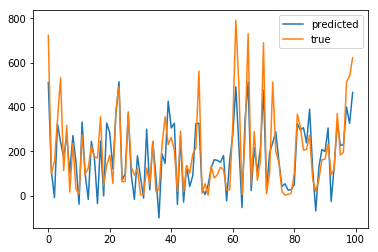

In [73]:
report(hourly_nn.predict(hourly_X_test), hourly_y_test, history)